In [27]:
%matplotlib inline

import pandas as pd
import numpy as np
from utility_functions import report
# sklearn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

import plotly.express as px
from statistics import mean
import matplotlib.pyplot as plt
from random import randint
from tqdm import tqdm
from fma_metadata import utils

import warnings
warnings.filterwarnings('ignore')

In [28]:
features = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/features.csv')
features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]

In [29]:
labels = pd.read_csv('/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2/Data/Labels [generated]/labels_genre_top.csv')
labels=labels.set_index('track_id')
labels.head()

genre_top
track_id          
2          Hip-Hop
3          Hip-Hop
5          Hip-Hop
10             Pop
20             NaN

In [30]:
features = features.merge(labels, on='track_id')
features.head()

(chroma_cens, kurtosis, 01)  (chroma_cens, kurtosis, 02)  \
track_id                                                             
2                            7.180653                     5.230309   
3                            1.888963                     0.760539   
5                            0.527563                    -0.077654   
10                           3.702245                    -0.291193   
20                          -0.193837                    -0.198527   

          (chroma_cens, kurtosis, 03)  (chroma_cens, kurtosis, 04)  \
track_id                                                             
2                            0.249321                     1.347620   
3                            0.345297                     2.295201   
5                           -0.279610                     0.685883   
10                           2.196742                    -0.234449   
20                           0.201546                     0.258556   

          (chroma_cens, kurtosis, 05)  (chroma_cens, kurtosis, 06)  \
track_id                                                             
2                            1.482478                     0.531371   
3                            1.654031                     0.067592   
5                            1.937570                     0.880839   
10                           1.367364                     0.998411   
20                           0.775204                     0.084794   

          (chroma_cens, kurtosis, 07)  (chroma_cens, kurtosis, 08)  \
track_id                                                             
2                            1.481593                     2.691455   
3                            1.366848                     1.054094   
5                           -0.923192                    -0.927232   
10                           1.770694                     1.604566   
20                          -0.289294                    -0.816410   

          (chroma_cens, kurtosis, 09)  (chroma_cens, kurtosis, 10)  ...  \
track_id                                                            ...   
2                            0.866868                     1.341231  ...   
3                            0.108103                     0.619185  ...   
5                            0.666617                     1.038546  ...   
10                           0.521217                     1.982386  ...   
20                           0.043851                    -0.804761  ...   

          (tonnetz, std, 05)  (tonnetz, std, 06)  (zcr, kurtosis, 01)  \
track_id                                                                
2                   0.012226            0.012111             5.758890   
3                   0.014212            0.017740             2.824694   
5                   0.012691            0.014759             6.808415   
10                  0.017952            0.013921            21.434212   
20                  0.022492            0.021355            16.669037   

          (zcr, max, 01)  (zcr, mean, 01)  (zcr, median, 01)  (zcr, min, 01)  \
track_id                                                                       
2               0.459473         0.085629           0.071289        0.000000   
3               0.466309         0.084578           0.063965        0.000000   
5               0.375000         0.053114           0.041504        0.000000   
10              0.452148         0.077515           0.071777        0.000000   
20              0.469727         0.047225           0.040039        0.000977   

          (zcr, skew, 01)  (zcr, std, 01)  genre_top  
track_id                                              
2                2.089872        0.061448    Hip-Hop  
3                1.716724        0.069330    Hip-Hop  
5                2.193303        0.044861    Hip-Hop  
10               3.542325        0.040800        Pop  
20               3.189831        0.030993        NaN  

[5 rows x 519 columns]

In [31]:
# drop NaN
features.dropna(inplace=True)
features.head()

(chroma_cens, kurtosis, 01)  (chroma_cens, kurtosis, 02)  \
track_id                                                             
2                            7.180653                     5.230309   
3                            1.888963                     0.760539   
5                            0.527563                    -0.077654   
10                           3.702245                    -0.291193   
134                          0.918445                     0.674147   

          (chroma_cens, kurtosis, 03)  (chroma_cens, kurtosis, 04)  \
track_id                                                             
2                            0.249321                     1.347620   
3                            0.345297                     2.295201   
5                           -0.279610                     0.685883   
10                           2.196742                    -0.234449   
134                          0.577818                     1.281117   

          (chroma_cens, kurtosis, 05)  (chroma_cens, kurtosis, 06)  \
track_id                                                             
2                            1.482478                     0.531371   
3                            1.654031                     0.067592   
5                            1.937570                     0.880839   
10                           1.367364                     0.998411   
134                          0.933746                     0.078177   

          (chroma_cens, kurtosis, 07)  (chroma_cens, kurtosis, 08)  \
track_id                                                             
2                            1.481593                     2.691455   
3                            1.366848                     1.054094   
5                           -0.923192                    -0.927232   
10                           1.770694                     1.604566   
134                          1.199204                    -0.175223   

          (chroma_cens, kurtosis, 09)  (chroma_cens, kurtosis, 10)  ...  \
track_id                                                            ...   
2                            0.866868                     1.341231  ...   
3                            0.108103                     0.619185  ...   
5                            0.666617                     1.038546  ...   
10                           0.521217                     1.982386  ...   
134                          0.925482                     1.438509  ...   

          (tonnetz, std, 05)  (tonnetz, std, 06)  (zcr, kurtosis, 01)  \
track_id                                                                
2                   0.012226            0.012111             5.758890   
3                   0.014212            0.017740             2.824694   
5                   0.012691            0.014759             6.808415   
10                  0.017952            0.013921            21.434212   
134                 0.016322            0.015819             4.731087   

          (zcr, max, 01)  (zcr, mean, 01)  (zcr, median, 01)  (zcr, min, 01)  \
track_id                                                                       
2               0.459473         0.085629           0.071289             0.0   
3               0.466309         0.084578           0.063965             0.0   
5               0.375000         0.053114           0.041504             0.0   
10              0.452148         0.077515           0.071777             0.0   
134             0.419434         0.064370           0.050781             0.0   

          (zcr, skew, 01)  (zcr, std, 01)  genre_top  
track_id                                              
2                2.089872        0.061448    Hip-Hop  
3                1.716724        0.069330    Hip-Hop  
5                2.193303        0.044861    Hip-Hop  
10               3.542325        0.040800        Pop  
134              1.806106        0.054623    Hip-Hop  

[5 rows x 519 columns]

In [32]:
features.isnull().sum()

(chroma_cens, kurtosis, 01)    0
(chroma_cens, kurtosis, 02)    0
(chroma_cens, kurtosis, 03)    0
(chroma_cens, kurtosis, 04)    0
(chroma_cens, kurtosis, 05)    0
                              ..
(zcr, median, 01)              0
(zcr, min, 01)                 0
(zcr, skew, 01)                0
(zcr, std, 01)                 0
genre_top                      0
Length: 519, dtype: int64

In [33]:
features.genre_top.value_counts()

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: genre_top, dtype: int64

In [34]:
# selecting subset

In [35]:
genres_subset = ['Rock','Electronic','Hip-Hop','Folk','Old-Time / Historic','Pop',
          'Classical','Jazz']
# generating dataset for multiclass classification task
feat_all = features[features['genre_top'].isin(genres_subset)]
feat_all.head()

(chroma_cens, kurtosis, 01)  (chroma_cens, kurtosis, 02)  \
track_id                                                             
2                            7.180653                     5.230309   
3                            1.888963                     0.760539   
5                            0.527563                    -0.077654   
10                           3.702245                    -0.291193   
134                          0.918445                     0.674147   

          (chroma_cens, kurtosis, 03)  (chroma_cens, kurtosis, 04)  \
track_id                                                             
2                            0.249321                     1.347620   
3                            0.345297                     2.295201   
5                           -0.279610                     0.685883   
10                           2.196742                    -0.234449   
134                          0.577818                     1.281117   

          (chroma_cens, kurtosis, 05)  (chroma_cens, kurtosis, 06)  \
track_id                                                             
2                            1.482478                     0.531371   
3                            1.654031                     0.067592   
5                            1.937570                     0.880839   
10                           1.367364                     0.998411   
134                          0.933746                     0.078177   

          (chroma_cens, kurtosis, 07)  (chroma_cens, kurtosis, 08)  \
track_id                                                             
2                            1.481593                     2.691455   
3                            1.366848                     1.054094   
5                           -0.923192                    -0.927232   
10                           1.770694                     1.604566   
134                          1.199204                    -0.175223   

          (chroma_cens, kurtosis, 09)  (chroma_cens, kurtosis, 10)  ...  \
track_id                                                            ...   
2                            0.866868                     1.341231  ...   
3                            0.108103                     0.619185  ...   
5                            0.666617                     1.038546  ...   
10                           0.521217                     1.982386  ...   
134                          0.925482                     1.438509  ...   

          (tonnetz, std, 05)  (tonnetz, std, 06)  (zcr, kurtosis, 01)  \
track_id                                                                
2                   0.012226            0.012111             5.758890   
3                   0.014212            0.017740             2.824694   
5                   0.012691            0.014759             6.808415   
10                  0.017952            0.013921            21.434212   
134                 0.016322            0.015819             4.731087   

          (zcr, max, 01)  (zcr, mean, 01)  (zcr, median, 01)  (zcr, min, 01)  \
track_id                                                                       
2               0.459473         0.085629           0.071289             0.0   
3               0.466309         0.084578           0.063965             0.0   
5               0.375000         0.053114           0.041504             0.0   
10              0.452148         0.077515           0.071777             0.0   
134             0.419434         0.064370           0.050781             0.0   

          (zcr, skew, 01)  (zcr, std, 01)  genre_top  
track_id                                              
2                2.089872        0.061448    Hip-Hop  
3                1.716724        0.069330    Hip-Hop  
5                2.193303        0.044861    Hip-Hop  
10               3.542325        0.040800        Pop  
134              1.806106        0.054623    Hip-Hop  

[5 rows x 519 columns]

In [36]:
feat_all.shape

(34596, 519)

In [37]:
pd.concat([feat_all.genre_top.value_counts(),
                round(feat_all.genre_top.value_counts(normalize=True).mul(100),2)],
          axis=1,
          keys=('counts','percentage (%)'))

counts  percentage (%)
Rock                  14182           40.99
Electronic             9372           27.09
Hip-Hop                3552           10.27
Folk                   2803            8.10
Pop                    2332            6.74
Classical              1230            3.56
Jazz                    571            1.65
Old-Time / Historic     554            1.60

In [38]:
# encoding labels
le = preprocessing.LabelEncoder()
feat_all['genre_top'] = le.fit_transform(feat_all['genre_top'])
print('Legend:\n0: Classical\n1: Electronic\n2: Folk\n3: Hip-Hop\n4: Jazz\n5: Old-Time / Historic\n6: Pop\n7: Rock')
feat_all.genre_top.value_counts()

Legend:
0: Classical
1: Electronic
2: Folk
3: Hip-Hop
4: Jazz
5: Old-Time / Historic
6: Pop
7: Rock


7    14182
1     9372
3     3552
2     2803
6     2332
0     1230
4      571
5      554
Name: genre_top, dtype: int64

In [39]:
# detach target col
labels = feat_all[['genre_top']]
labels.reset_index(drop=True, inplace=True)
labels = labels['genre_top']

In [40]:
feat_all.drop('genre_top', axis=1, inplace=True)

In [41]:
# normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feat_all)

# 1. PCA on scaled data
### 1.1 scree-plot

Text(0.5, 0, 'Principal Component #')

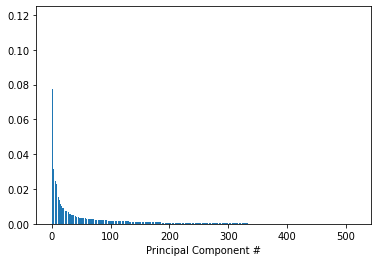

In [42]:
pca = PCA()
pca.fit(scaled_features)
# get explained variance ratios from PCA using all features
exp_variance = pca.explained_variance_ratio_
# plot explained variance
fig, ax= plt.subplots()
ax.bar(range(pca.n_components_),exp_variance)
ax.set_xlabel('Principal Component #')

### 1.2 cumulative explained variance plot

Optimal number of components: 152
Explained variation per principal component:
[1.19045918e-01 7.75472323e-02 4.09358743e-02 3.14708249e-02
 2.93193965e-02 2.59461346e-02 2.46854612e-02 2.37764997e-02
 2.28110193e-02 2.04168646e-02 1.78719788e-02 1.55423005e-02
 1.42070758e-02 1.39018382e-02 1.30138548e-02 1.16497565e-02
 1.03535566e-02 9.78742297e-03 9.35364858e-03 9.20689493e-03
 8.88709493e-03 8.27491225e-03 8.00739328e-03 7.58835894e-03
 7.26664910e-03 7.10596178e-03 6.89994324e-03 6.55399652e-03
 6.52770406e-03 6.30209263e-03 5.72200725e-03 5.55734011e-03
 5.41593903e-03 5.26538662e-03 5.11653837e-03 5.01000144e-03
 4.85771739e-03 4.77991602e-03 4.51631790e-03 4.44542856e-03
 4.42333617e-03 4.28092829e-03 4.04121013e-03 3.94219448e-03
 3.88860449e-03 3.74428489e-03 3.64467946e-03 3.60659547e-03
 3.53373031e-03 3.46182633e-03 3.43455869e-03 3.41878646e-03
 3.36796044e-03 3.25096181e-03 3.20614680e-03 3.16137148e-03
 3.10813525e-03 3.05675451e-03 2.97087625e-03 2.92969558e-03
 2.916

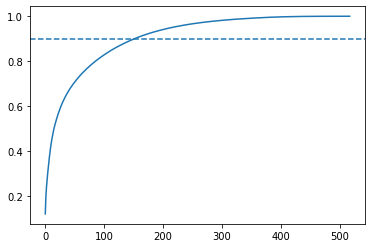

In [43]:
# calculate the cumulative explained variance
cum_exp_var = np.cumsum(exp_variance)

# plot the cumulative explained variance and draw a dashed line at 0.9\
# This line indicates how much variance (information) we want to retain
fig, ax= plt.subplots()
ax.plot(cum_exp_var)
ax.axhline(y=0.9, linestyle='--')

# find index where cum_exp_var exceeds 0.9 and adding 1 to that index to get the num of components
n_components = ((np.where(cum_exp_var > 0.9))[0][0])
print(f"Optimal number of components: {n_components}")
print(f"Explained variation per principal component:\n{pca.explained_variance_ratio_}")
# perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components,random_state=10)
pca.fit(scaled_features)
pca_proj = pca.transform(scaled_features)

### 1.3 plot PCA in 2D

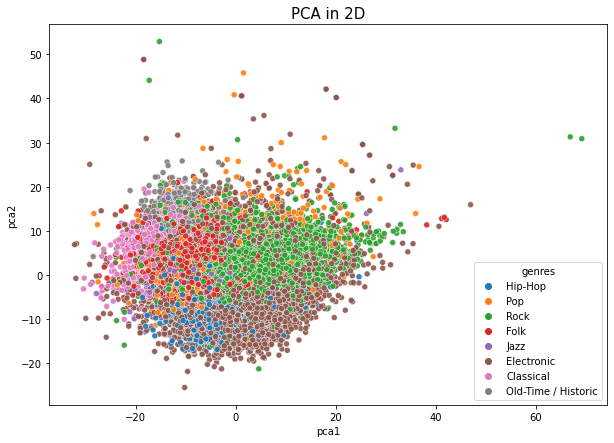

In [44]:
# generating df for plotting PCA
df = pd.DataFrame()
df['pca1'] = pca_proj[:,0]
df['pca2'] = pca_proj[:,1]
df['pca3'] = pca_proj[:,2]
df['genres'] = le.inverse_transform(labels)

# plot scatter of PCA
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca1", y="pca2",
    hue='genres',
    data=df,
    legend="full",
    alpha=0.9
)
plt.title("PCA in 2D", fontsize= 15)
plt.show()

Rock, Folk, Classical, Old-Time/Historic, Electronic are well separated.

# 1.4 plot PCA in 3D

In [45]:
# 3D PCA
#total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    df, x='pca1', y='pca2', z='pca3', color='genres',
    #title=f'Total Explained Variance: {total_var:.2f}%',
    #labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.update_layout(legend=dict(
    orientation="v",
    yanchor="bottom",
    y=1,
    xanchor="right",
    x=0.6
),width=700, height=700, scene_camera_eye_z=0.8)
fig.show()

# 2. Model selection

In [46]:
# shuffle and split into development set and internal test set:
# (PCA)
Xpca_develop, Xpca_test, y_develop_pca, y_test_pca = train_test_split(
pca_proj, labels, test_size=0.30, random_state=10)

# (no PCA)
X_develop, X_test, y_develop, y_test = train_test_split(
scaled_features, labels, test_size=0.30, random_state=10)

In [47]:
# check partitions
print(f"____Legend_____\n0: Classical\n1: Electronic\n2: Folk\n3: Hip-Hop\n4: Jazz\n5: Old-Time / Historic\n6: Pop\
\n7: Rock'\n\n***PCA***\nDevelopment set:\n{y_develop_pca.value_counts()}\n\nInternal Test:\
\n{y_test_pca.value_counts()}\n\n\-----------------\n\***No-PCA***\nDevelopment set:\n{y_develop.value_counts()}\n\nInternal Test:\n{y_test.value_counts()}")

____Legend_____
0: Classical
1: Electronic
2: Folk
3: Hip-Hop
4: Jazz
5: Old-Time / Historic
6: Pop
7: Rock'

***PCA***
Development set:
7    9961
1    6551
3    2503
2    1952
6    1616
0     857
5     390
4     387
Name: genre_top, dtype: int64

Internal Test:
7    4221
1    2821
3    1049
2     851
6     716
0     373
4     184
5     164
Name: genre_top, dtype: int64

\-----------------
\***No-PCA***
Development set:
7    9961
1    6551
3    2503
2    1952
6    1616
0     857
5     390
4     387
Name: genre_top, dtype: int64

Internal Test:
7    4221
1    2821
3    1049
2     851
6     716
0     373
4     184
5     164
Name: genre_top, dtype: int64


## Model Selection

# 2.1 Decision Tree -  Unbalanced - without PCA
### 2.1.1 5 fold cross validation - grid search

In [48]:
param_grid = {
               "max_depth": [4,5,6,8,10,15,20],
               "min_samples_leaf": [25,55,100,250],
               "criterion": ["gini", "entropy"]
             }
# model
dtc = DecisionTreeClassifier()
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = GridSearchCV(dtc, cv =stratified_cv , param_grid=param_grid, n_jobs=2, verbose=True)

random_search.fit(X_develop, y_develop)
dtc=random_search.best_estimator_
report(random_search.cv_results_, n_top=10)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Model with rank: 1
Mean validation score: 0.636 (std: 0.005)
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 55}

Model with rank: 2
Mean validation score: 0.635 (std: 0.003)
Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 25}

Model with rank: 3
Mean validation score: 0.634 (std: 0.002)
Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 55}

Model with rank: 4
Mean validation score: 0.632 (std: 0.006)
Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 55}

Model with rank: 5
Mean validation score: 0.632 (std: 0.005)
Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 55}

Model with rank: 6
Mean validation score: 0.632 (std: 0.005)
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100}

Model with rank: 7
Mean validation score: 0.631 (std: 0.008)
Parameters: {'criterion': 'gini', 'max_depth'

### 2.1.3 Retrain on full development set and prediction

In [50]:
dtc = DecisionTreeClassifier(criterion= 'entropy',max_depth=10, min_samples_leaf= 55)
dtc.fit(X_develop,y_develop)

y_pred_dtc = dtc.predict(X_test)
print('Legend:\n0: Classical\n1: Electronic\n2: Folk\n3: Hip-Hop\n4: Jazz\n5: Old-Time / Historic\n6: Pop\n7: Rock')
print('Accuracy %s' % accuracy_score(y_test, y_pred_dtc))
print('F1-score %s' % f1_score(y_test, y_pred_dtc, average=None))
print(classification_report(y_test, y_pred_dtc))

'''
# y_score0 --> scores of decision tree without PCA
# fpr0, tpr0 ---> false positive and true positive of decision tree without PCA
y_score0 = dtc.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score0[:, 1])

# roc_auc0 --> ROC/AUC of decision tree without PCA
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='red', lw=3, label='$AUC_{without PCA}$ = %.3f' % roc_auc0)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - without PCA', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()'''

Legend:
0: Classical
1: Electronic
2: Folk
3: Hip-Hop
4: Jazz
5: Old-Time / Historic
6: Pop
7: Rock
Accuracy 0.6329126120050101
F1-score [0.70013569 0.61788618 0.49223417 0.42641947 0.09090909 0.77453581
 0.05700713 0.76619149]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       373
           1       0.56      0.69      0.62      2821
           2       0.50      0.48      0.49       851
           3       0.54      0.35      0.43      1049
           4       0.28      0.05      0.09       184
           5       0.69      0.89      0.77       164
           6       0.19      0.03      0.06       716
           7       0.73      0.81      0.77      4221

    accuracy                           0.63     10379
   macro avg       0.52      0.50      0.49     10379
weighted avg       0.60      0.63      0.61     10379



'\n# y_score0 --> scores of decision tree without PCA\n# fpr0, tpr0 ---> false positive and true positive of decision tree without PCA\ny_score0 = dtc.predict_proba(X_test)\nfpr0, tpr0, _ = roc_curve(y_test, y_score0[:, 1])\n\n# roc_auc0 --> ROC/AUC of decision tree without PCA\nroc_auc0 = auc(fpr0, tpr0)\n\nplt.plot(fpr0, tpr0, color=\'red\', lw=3, label=\'$AUC_{without PCA}$ = %.3f\' % roc_auc0)\n\nplt.plot([0, 1], [0, 1], color=\'black\', lw=2, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\', fontsize=16)\nplt.ylabel(\'True Positive Rate\', fontsize=16)\nplt.title(\'ROC curve - without PCA\', fontsize=16)\nplt.legend(loc="lower right", fontsize=14, frameon=False)\nplt.tick_params(axis=\'both\', which=\'major\', labelsize=16)\nplt.show()'

Legend:
0: Classical
1: Electronic
2: Folk
3: Hip-Hop
4: Jazz
5: Old-Time / Historic
6: Pop
7: Rock

[[ 258   56   25    3    0   13    1   17]
 [  34 1938  110  145    1   16   35  542]
 [  19  160  412   30    9   11   18  192]
 [   0  489   30  368    2    1   14  145]
 [  11   54   31    2   10    4    5   67]
 [   5    5    3    0    0  146    1    4]
 [  14  239   78   38    3   12   24  308]
 [  23  511  134   91   11   10   28 3413]]


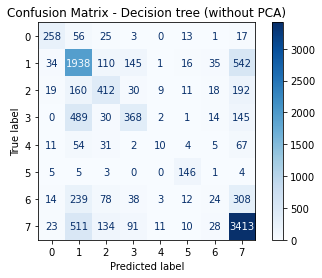

In [51]:
# confusion matrix - Internal Test
print('Legend:\n0: Classical\n1: Electronic\n2: Folk\n3: Hip-Hop\n4: Jazz\n5: Old-Time / Historic\n6: Pop\n7: Rock\n')
cm = plot_confusion_matrix(dtc,X_test,y_test,
                            cmap = plt.cm.Blues)
cm.ax_.set_title('Confusion Matrix - Decision tree (without PCA)')
print(cm.confusion_matrix)
plt.show()

# 2.2 Decision Tree -  Unbalanced - with PCA
### 2.2.1 10 fold cross validation - grid search

In [52]:
# model
dtc_pca = DecisionTreeClassifier()
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search_pca = GridSearchCV(dtc, cv =stratified_cv , param_grid=param_grid, n_jobs=2, verbose=True)

random_search_pca.fit(Xpca_develop, y_develop_pca)
dtc_pca=random_search_pca.best_estimator_
report(random_search_pca.cv_results_, n_top=10)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Model with rank: 1
Mean validation score: 0.612 (std: 0.001)
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 55}

Model with rank: 2
Mean validation score: 0.612 (std: 0.002)
Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 55}

Model with rank: 3
Mean validation score: 0.612 (std: 0.004)
Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 55}

Model with rank: 4
Mean validation score: 0.611 (std: 0.007)
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100}

Model with rank: 5
Mean validation score: 0.610 (std: 0.007)
Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 55}

Model with rank: 6
Mean validation score: 0.610 (std: 0.005)
Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100}

Model with rank: 7
Mean validation score: 0.609 (std: 0.003)
Parameters: {'criterion': 'entropy', 'max_depth

### 2.2.2 5 fold cross validation - grid search

In [ ]:
dtc_pca = DecisionTreeClassifier()
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search_pca = GridSearchCV(dtc, cv =stratified_cv , param_grid=param_grid, n_jobs=2, verbose=True)

random_search_pca.fit(Xpca_develop, y_develop_pca)
dtc_pca=random_search_pca.best_estimator_
report(random_search_pca.cv_results_, n_top=10)

### 2.2.3 Retrain on full development set and prediction

In [53]:
dtc_pca = DecisionTreeClassifier(criterion= 'entropy',max_depth=10, min_samples_leaf= 35)
dtc_pca.fit(Xpca_develop,y_develop_pca)

y_pred_dtc_pca = dtc_pca.predict(Xpca_test)

print('Accuracy %s' % accuracy_score(y_test_pca, y_pred_dtc_pca))
print('F1-score %s' % f1_score(y_test_pca, y_pred_dtc_pca, average=None))
print(classification_report(y_test_pca, y_pred_dtc_pca))

'''
# y_score1 --> scores of decision tree with PCA
# fpr1, tpr1 ---> false positive and true positive of decision tree with PCA
y_score1 = dtc_pca.predict_proba(Xpca_test)
fpr1, tpr1, _ = roc_curve(y_test_pca, y_score1[:, 1])

# roc_auc1 --> ROC/AUC of decision tree with PCA
roc_auc1 = auc(fpr1, tpr1)

plt.plot(fpr1, tpr1, color='blue', lw=3, label='$AUC_{with PCA}$ = %.3f' % roc_auc1)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - with PCA', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show() '''

Accuracy 0.6099816938047982
F1-score [0.63955119 0.59916874 0.44457275 0.37534397 0.18699187 0.73273273
 0.04020101 0.74983527]
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       373
           1       0.56      0.64      0.60      2821
           2       0.44      0.45      0.44       851
           3       0.44      0.33      0.38      1049
           4       0.37      0.12      0.19       184
           5       0.72      0.74      0.73       164
           6       0.20      0.02      0.04       716
           7       0.70      0.81      0.75      4221

    accuracy                           0.61     10379
   macro avg       0.51      0.47      0.47     10379
weighted avg       0.57      0.61      0.58     10379



'\n# y_score1 --> scores of decision tree with PCA\n# fpr1, tpr1 ---> false positive and true positive of decision tree with PCA\ny_score1 = dtc_pca.predict_proba(Xpca_test)\nfpr1, tpr1, _ = roc_curve(y_test_pca, y_score1[:, 1])\n\n# roc_auc1 --> ROC/AUC of decision tree with PCA\nroc_auc1 = auc(fpr1, tpr1)\n\nplt.plot(fpr1, tpr1, color=\'blue\', lw=3, label=\'$AUC_{with PCA}$ = %.3f\' % roc_auc1)\n\nplt.plot([0, 1], [0, 1], color=\'black\', lw=2, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\', fontsize=16)\nplt.ylabel(\'True Positive Rate\', fontsize=16)\nplt.title(\'ROC curve - with PCA\', fontsize=16)\nplt.legend(loc="lower right", fontsize=14, frameon=False)\nplt.tick_params(axis=\'both\', which=\'major\', labelsize=16)\nplt.show() '

Legend:
0: Classical
1: Electronic
2: Folk
3: Hip-Hop
4: Jazz
5: Old-Time / Historic
6: Pop
7: Rock

[[ 228   35   63    3    6    4    1   33]
 [  35 1802  103  237    8   12   17  607]
 [  25  138  385   18   12   15    8  250]
 [   0  499   15  341    2    0   10  182]
 [  17   39   32    4   23    0    1   68]
 [   8    9   16    0    0  122    0    9]
 [  10  217   92   50    4    5   16  322]
 [  17  455  175  115    7   11   27 3414]]


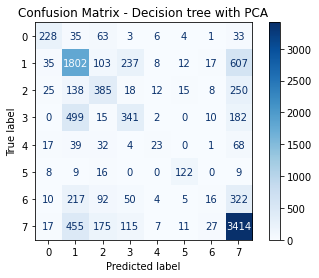

In [54]:
# confusion matrix Decision tree with PCA
print('Legend:\n0: Classical\n1: Electronic\n2: Folk\n3: Hip-Hop\n4: Jazz\n5: Old-Time / Historic\n6: Pop\n7: Rock\n')
cm_pca = plot_confusion_matrix(dtc_pca,Xpca_test,y_test_pca,
                            cmap = plt.cm.Blues)
cm_pca.ax_.set_title('Confusion Matrix - Decision tree with PCA')
print(cm_pca.confusion_matrix)
plt.show()

# 2.3 Comparing ROC Decision tree (unbalanced) with and without PCA

In [ ]:
'''
plt.plot(fpr0, tpr0, color='red', lw=3, label='$AUC_{without PCA}$ = %.3f' % roc_auc0)
plt.plot(fpr1, tpr1, color='blue', lw=3, label='$AUC_{with PCA}$ = %.3f' % roc_auc1)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()'''

# 3.1 KNN binary class - Unbalanced (without PCA)

### 3.1.1 10 fold cross validation - grid search

In [ ]:
# range of k to try - find a good range of k
k_range = range(1, 40)
# empty list to store scores
k_scores = []

for k in tqdm(k_range):
    # run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_develop, y_develop, cv=10, scoring='accuracy')
    # append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

print(k_scores)
print(f"maximum score: {max(k_scores)} for k = {k_scores.index(max(k_scores))+1}")

In [ ]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('K ')
plt.ylabel('Cross-validated accuracy')

## 3.1.2 Prediction on Internal test set (KNN - without PCA)

In [ ]:
X_test.shape, y_test.shape

In [ ]:
knn_classifier =  KNeighborsClassifier(n_neighbors = 29)

# retrain knn on the whole development set
knn_classifier.fit(X_develop, y_develop)
# predict target variable
y_pred_knn0 = knn_classifier.predict(X_test)
# display classification report
print(classification_report(y_test, y_pred_knn0))
print('legend:\n0: Hip-Hop\n1: Rock')

'''
# plot ROC curve -KNN
y_score_knn0 = knn_classifier.predict_proba(X_test)
fpr_knn0, tpr_knn0, _ = roc_curve(y_test, y_score_knn0[:, 1])
roc_auc_knn0 = auc(fpr_knn0, tpr_knn0)

plt.plot(fpr_knn0, tpr_knn0, color='red', lw=3, label='$AUC_{KNN}$ = %.3f' % roc_auc_knn0)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - without PCA', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()'''

In [ ]:
# confusion matrix KNN - Internal test
print('Legend:\n0: Classical\n1: Electronic\n2: Folk\n3: Hip-Hop\n4: Jazz\n5: Old-Time / Historic\n6: Pop\n7: Rock\n')
cm_knn = plot_confusion_matrix(knn_classifier,X_test,y_test,
                            cmap = plt.cm.Blues)
cm_knn.ax_.set_title('Confusion Matrix - KNN without PCA')
print(cm_knn.confusion_matrix)
plt.show()

# 3.2 KNN binary class - Unbalanced (with PCA)
### 3.2.1 10 fold cross validation - grid search

In [ ]:
# range of k to try - find a good range of k
k_range = range(1, 40)
# empty list to store scores
k_scores = []

for k in tqdm(k_range):
    # run KNeighborsClassifier with k neighbours
    knn_pca = KNeighborsClassifier(n_neighbors=k)
    # obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn_pca, Xpca_develop, y_develop_pca, cv=10, scoring='accuracy')
    # append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

print(k_scores)
print(f"maximum score: {max(k_scores)} for k = {k_scores.index(max(k_scores))+1}")

In [ ]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('K ')
plt.ylabel('Cross-validated accuracy')

## 3.1.2 Prediction on Internal test set (KNN - with PCA)

In [ ]:
knn_classifier_pca =  KNeighborsClassifier(n_neighbors = 14)
# retrain knn on the whole development set
knn_classifier_pca.fit(Xpca_develop, y_develop_pca)
# predict target variable
y_pred_knn1 = knn_classifier_pca.predict(Xpca_test)
# display classification report
print(classification_report(y_test_pca, y_pred_knn1))
print('legend:\n0: Hip-Hop\n1: Rock')
'''
# plot ROC curve -KNN
y_score_knn1 = knn_classifier_pca.predict_proba(Xpca_test)
fpr_knn1, tpr_knn1, _ = roc_curve(y_test_pca, y_score_knn1[:, 1])
roc_auc_knn1 = auc(fpr_knn1, tpr_knn1)

plt.plot(fpr_knn1, tpr_knn1, color='blue', lw=3, label='$AUC_{knnPCA}$ = %.3f' % roc_auc_knn1)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()'''

# Compare KNN ROC with and without PCA

In [ ]:
'''
plt.plot(fpr_knn0, tpr_knn0, color='red', lw=3, label='$AUC_{knn}$ = %.3f' % roc_auc_knn0)
plt.plot(fpr_knn1, tpr_knn1, color='blue', lw=3, label='$AUC_{knnPCA}$ = %.3f' % roc_auc_knn1)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve with PCA', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()
'''

# Compare Decision tree and KNN (best scores)

In [ ]:
'''
plt.plot(fpr_knn0, tpr_knn0, color='orange', lw=3, label='$AUC_{KNN}$ = %.3f' % roc_auc_knn0)
plt.plot(fpr0, tpr0, color='black', lw=3, label='$AUC_{DecisionTree}$ = %.3f' % roc_auc0)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()'''